In [3]:
import re
from tqdm.notebook import tqdm
import pandas as pd 
import numpy as np
from datetime import datetime
import dateutil.parser
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords


# Load precessed data
process_data = pd.read_csv("/Users/huafa/Downloads/tweet_grouped_data.csv")


def cleaning(text):
    if isinstance(text, str):  # Check if it's a string
        return re.sub(r"\b\d+\b", '', text)
    else:
        return text  # If it's not a string, return the original value

process_data['tweet'] = process_data['tweet'].apply(cleaning)
process_data.info()


In [55]:
# remove stop words

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def rem_sw(text):
    if isinstance(text, str):
        sw = set(stopwords.words('english'))
        sent = [word for word in text.lower().split() if word not in sw]
        sent = ' '.join(sent)
        return sent
    else:
        return str(text)  # Convert non-string types to string

process_data['tweet_no_sw'] = process_data['tweet'].apply(rem_sw)


[nltk_data] Downloading package stopwords to /Users/huafa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
#Working with the most Frequent Words: 
from collections import Counter
cnt = Counter()
for text in process_data["tweet_no_sw"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

,word,count
0,amp,434
1,tesla,156
2,would,81
3,much,79
4,beta,69
5,like,68
6,high,64
7,fsd,63
8,time,62
9,next,62


In [57]:
# Lemmatization: Lemmatization is converting the word to its base form or lemma by removing affixes from the inflected words. 

import nltk
nltk.download('wordnet')
wordnet_lem = WordNetLemmatizer()

process_data['tweet_lem'] = process_data['tweet_no_sw'].apply(wordnet_lem.lemmatize)
process_data

[nltk_data] Downloading package wordnet to /Users/huafa/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,date,tweet,tweet_no_sw,tweet_lem
0,2021-02-01,feels weird helping make hopefully good versio...,feels weird helping make hopefully good versio...,feels weird helping make hopefully good versio...
1,2021-02-02,off twitter forwhileмы сделаемit will be fille...,twitter forwhileмы сделаемit filled graffiti a...,twitter forwhileмы сделаемit filled graffiti a...
2,2021-02-04,the most entertaining outcome is the most like...,entertaining outcome likelyno need begigachad ...,entertaining outcome likelyno need begigachad ...
3,2021-02-05,yeah by default engine with least lever arm wo...,yeah default engine least lever arm would shut...,yeah default engine least lever arm would shut...
4,2021-02-06,thatdamianjustscratchthe future currency of ea...,thatdamianjustscratchthe future currency earth...,thatdamianjustscratchthe future currency earth...
...,...,...,...,...
347,2022-01-27,i am in awe of swedencanadian truckers rulebid...,awe swedencanadian truckers rulebiden treating...,awe swedencanadian truckers rulebiden treating...
348,2022-01-28,if you scare people enough they will demand re...,scare people enough demand removal freedom pat...,scare people enough demand removal freedom pat...
349,2022-01-29,lie back and think of marsthe universe ishydro...,lie back think marsthe universe ishydrogen son...,lie back think marsthe universe ishydrogen son...
350,2022-01-30,how many gene sequence changes to covid befor...,many gene sequence changes covid isncovid anym...,many gene sequence changes covid isncovid anym...


In [58]:
# Tokenization
tokenized_review=process_data.drop(columns=['tweet','tweet_no_sw'])
tokenized_review.columns=['date','tweet']

tokenized_review['tweet_tokenized']=tokenized_review['tweet'].apply(lambda x: x.split())

tokenized_review.head(5)

,date,tweet,tweet_tokenized
0,2021-02-01,feels weird helping make hopefully good versio...,"[feels, weird, helping, make, hopefully, good,..."
1,2021-02-02,twitter forwhileмы сделаемit filled graffiti a...,"[twitter, forwhileмы, сделаемit, filled, graff..."
2,2021-02-04,entertaining outcome likelyno need begigachad ...,"[entertaining, outcome, likelyno, need, begiga..."
3,2021-02-05,yeah default engine least lever arm would shut...,"[yeah, default, engine, least, lever, arm, wou..."
4,2021-02-06,thatdamianjustscratchthe future currency earth...,"[thatdamianjustscratchthe, future, currency, e..."


In [67]:
import pandas as pd

# Assuming sentiment_scores_comb has a column named 'compound' and tokenized_review is the DataFrame with tweets
sentiment_scores_comb = pd.read_csv('/Users/huafa/Downloads/sentiment_scores_comb.csv', index_col=0)

# Categorizing sentiment scores
tokenized_review['compound'] = sentiment_scores_comb['compound']
tokenized_review['sentiment_category'] = sentiment_scores_comb['compound'].apply(lambda x: 'Positive' if x >= 0 else 'Negative')
tokenized_review.head()

#tokenized_review.to_csv('/Users/huafa/Downloads/tokenized_review.csv')

,date,tweet,tweet_tokenized,compound,sentiment_category
0,2021-02-01,feels weird helping make hopefully good versio...,"[feels, weird, helping, make, hopefully, good,...",0.8658,Positive
1,2021-02-02,twitter forwhileмы сделаемit filled graffiti a...,"[twitter, forwhileмы, сделаемit, filled, graff...",0.9153,Positive
2,2021-02-04,entertaining outcome likelyno need begigachad ...,"[entertaining, outcome, likelyno, need, begiga...",-0.4228,Negative
3,2021-02-05,yeah default engine least lever arm would shut...,"[yeah, default, engine, least, lever, arm, wou...",0.9237,Positive
4,2021-02-06,thatdamianjustscratchthe future currency earth...,"[thatdamianjustscratchthe, future, currency, e...",0.6249,Positive


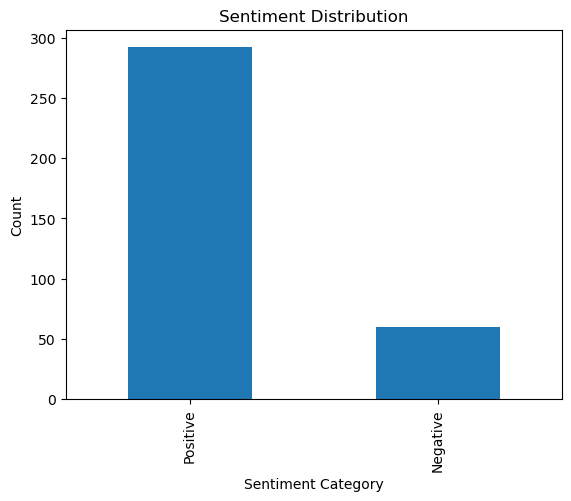

In [60]:
# Sentiment Distribution:
sentiment_counts = tokenized_review['sentiment_category'].value_counts()
sentiment_counts.plot(kind='bar')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import ComplementNB
from sklearn import metrics
import numpy as np

# Assuming X_data contains your tokenized text and y_data contains the sentiment categories
X_data, y_data = np.array(tokenized_review['tweet_tokenized']), np.array(tokenized_review['sentiment_category'])

# Convert tokenized text data to TF-IDF features
tfidf = TfidfVectorizer()
X_data_tfidf = tfidf.fit_transform([' '.join(words) for words in X_data])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_data_tfidf, y_data, test_size=0.20, random_state=0)
print('Data Split done.')

# Initialize and fit the CNB model
CNB = ComplementNB()
CNB.fit(X_train, y_train)

# Make predictions
predicted = CNB.predict(X_test)

# Calculate accuracy
accuracy_score = metrics.accuracy_score(predicted, y_test)
print("Accuracy:", accuracy_score)


print('ComplementNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))


Data Split done.
Accuracy: 0.7887323943661971
ComplementNB model accuracy is 78.87%
------------------------------------------------
Confusion Matrix:
   0   1
0  1  12
1  3  55
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

    Negative       0.25      0.08      0.12        13
    Positive       0.82      0.95      0.88        58

    accuracy                           0.79        71
   macro avg       0.54      0.51      0.50        71
weighted avg       0.72      0.79      0.74        71



In [62]:
from sklearn.naive_bayes import MultinomialNB

MNB = MultinomialNB()
MNB.fit(X_train, y_train)

predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('MultinominalNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

MultinominalNB model accuracy is 81.69%
------------------------------------------------
Confusion Matrix:
   0   1
0  0  13
1  0  58
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        13
    Positive       0.82      1.00      0.90        58

    accuracy                           0.82        71
   macro avg       0.41      0.50      0.45        71
weighted avg       0.67      0.82      0.73        71



/Users/huafa/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/huafa/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/huafa/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
from sklearn.naive_bayes import BernoulliNB

BNB = BernoulliNB()
BNB.fit(X_train, y_train)

predicted = BNB.predict(X_test)
accuracy_score_bnb = metrics.accuracy_score(predicted,y_test)

print('BernoulliNB model accuracy = ' + str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

BernoulliNB model accuracy = 80.28%
------------------------------------------------
Confusion Matrix:
   0   1
0  1  12
1  2  56
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

    Negative       0.33      0.08      0.12        13
    Positive       0.82      0.97      0.89        58

    accuracy                           0.80        71
   macro avg       0.58      0.52      0.51        71
weighted avg       0.73      0.80      0.75        71



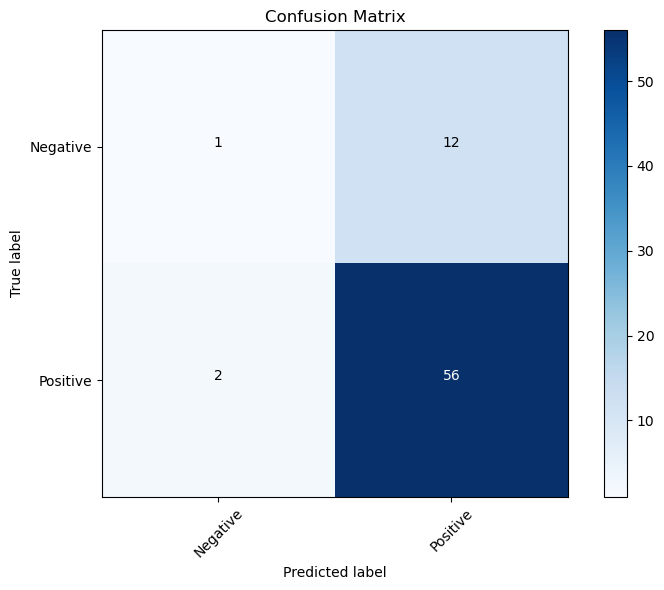

In [64]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'predicted' contains the predicted labels and 'y_test' contains the true labels
conf_matrix = confusion_matrix(y_test, predicted)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = np.unique(np.concatenate((y_test, predicted)))
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()
